# DEGs on the boundaries

In [1]:
#loading packages
library(Seurat)
library(ggplot2)
library(magrittr)
library(data.table)
library(Matrix)
library(dplyr)
library(tibble)
library(RColorBrewer)
library(gplots)
library(viridis)
library(tidyr)
library(gridExtra)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess


Loading required package: viridisLite


Attaching package: ‘tidyr’


The following objects are masked from ‘package:Matrix’:

    expand, pack, unpack


The following object is masked from ‘package:magrittr’:

    extract



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [2]:
sessionInfo()

R version 4.0.3 (2020-10-10)
Platform: x86_64-apple-darwin17.0 (64-bit)
Running under: macOS Catalina 10.15.7

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRblas.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRlapack.dylib

locale:
[1] ja_JP.UTF-8/ja_JP.UTF-8/ja_JP.UTF-8/C/ja_JP.UTF-8/ja_JP.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] gridExtra_2.3      tidyr_1.1.2        viridis_0.5.1      viridisLite_0.3.0 
 [5] gplots_3.1.1       RColorBrewer_1.1-2 tibble_3.0.5       dplyr_1.0.3       
 [9] Matrix_1.3-2       data.table_1.13.6  magrittr_2.0.1     ggplot2_3.3.3     
[13] Seurat_3.2.3      

loaded via a namespace (and not attached):
 [1] nlme_3.1-151          bitops_1.0-6          matrixStats_0.57.0   
 [4] RcppAnnoy_0.0.18      httr_1.4.2            repr_1.1.0           
 [7] sctransform_0.3.2     tools_4.0.3       

In [3]:
#loading data
seu_PR <- readRDS(file = "../../data/seurat_object/Set3/seu_lateralect_PR_ID.obj")

In [4]:
seu_PR

An object of class Seurat 
28745 features across 1717 samples within 2 assays 
Active assay: SCT (11239 features, 3000 variable features)
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, umap, reumap

In [5]:
Idents(seu_PR) <- "pairrule_ID"
levels <- c("O1","O2","O3","O4", "E1","E2","E3","E4")
levels(seu_PR) <- levels

In [6]:
cell.number <- table(seu_PR$pairrule_ID)
cell.number <- cell.number[levels]
cell.number


 O1  O2  O3  O4  E1  E2  E3  E4 
285 261 189 204 177 203 194 204 

In [7]:
degs <- read.table("./DEG_boundary_FC1.75/unique_DEGs_list_FWER0.01_FC1.75.txt")$V1

In [8]:
head(degs)
length(degs)

[1] "pxb" "hh"  "en"  "odd" "gsb" "drm"

[1] 52

In [9]:
glad.table <- read.table('../../GLAD/conversion_list_with_modified_GLAD_rm_intracellular_organella.tsv', sep = '\t', header = 1, quote = NULL, na.strings = 'NNNNN')
row.names(glad.table) <- glad.table$BDGP_ref_symbol
glad.table <- transform(glad.table, Modified_GLAD = factor(Modified_GLAD, levels = c('PM-related','others','Not in GLAD','TF')))

In [10]:
head(glad.table)

,id_in_Flybase,symbol_in_Flybase,BDGP_ref_id,BDGP_ref_symbol,GO_term_analysis,in_GRAD_db,in_BDGP_gtf,Modified_GLAD
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>
CG34178-CG34177,FBgn0085206,CG34177,Edited00000,CG34178-CG34177,True,in_GRAD_db,in_BDGP_gtf,PM-related
SP555-CG14042,FBgn0260470,SP555,Edited00001,SP555-CG14042,True,in_GRAD_db,in_BDGP_gtf,Not in GLAD
Edited00002,FBgn0053995,CG33995,Edited00002,Edited00002,True,in_GRAD_db,in_BDGP_gtf,Not in GLAD
CG45075-Kr-h1,FBgn0266450,Kr-h1,Edited00003,CG45075-Kr-h1,True,in_GRAD_db,in_BDGP_gtf,TF
CG34310-cup,FBgn0000392,cup,Edited00004,CG34310-cup,True,in_GRAD_db,in_BDGP_gtf,others
CG43355-sala,FBgn0003313,sala,Edited00005,CG43355-sala,True,in_GRAD_db,in_BDGP_gtf,PM-related


In [11]:
levels <- c('PM-related','Not in GLAD','others','TF')
df.plot <- table(glad.table$Modified_GLAD)
df.plot <- df.plot[levels]
df.plot <- as.data.frame(df.plot)
head(df.plot)

,Var1,Freq
,<fct>,<int>
1,PM-related,3451
2,Not in GLAD,7952
3,others,5084
4,TF,1018


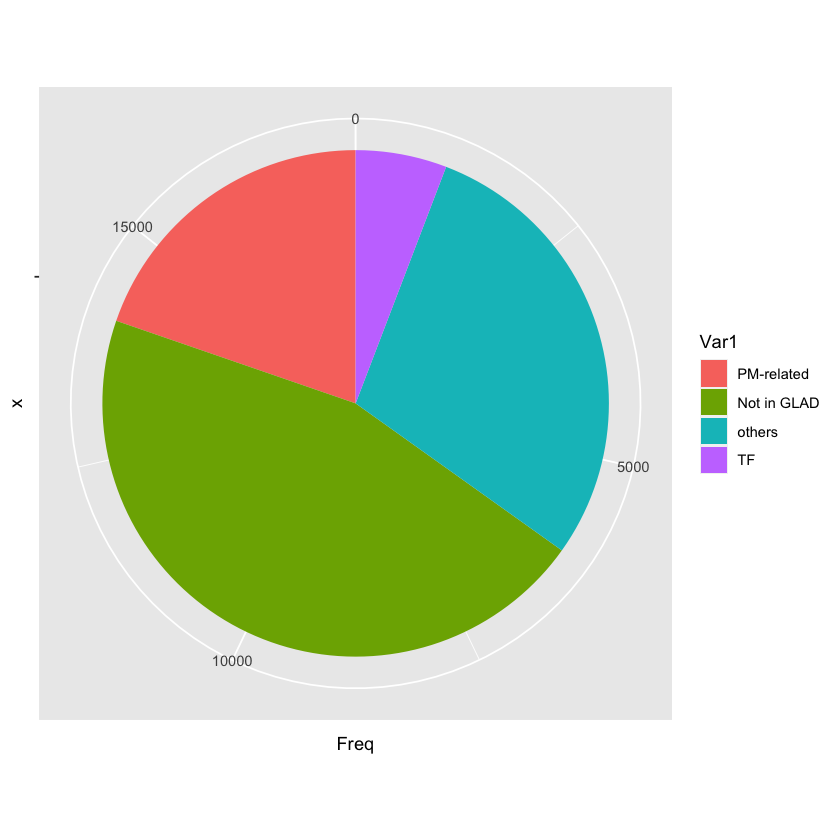

In [12]:
g <- ggplot(df.plot, aes(x="", y=Freq, fill=Var1)) +
   geom_bar(stat="identity", width = 1) + 
   coord_polar("y")
g

In [13]:
glad.table.degs <- glad.table[degs,]
levels <- c('PM-related','Not in GLAD','others','TF')
df.plot <- table(glad.table.degs$Modified_GLAD)
df.plot <- df.plot[levels]
df.plot <- as.data.frame(df.plot)
head(df.plot)

,Var1,Freq
,<fct>,<int>
1,PM-related,17
2,Not in GLAD,7
3,others,5
4,TF,23


Saving 7 x 7 in image



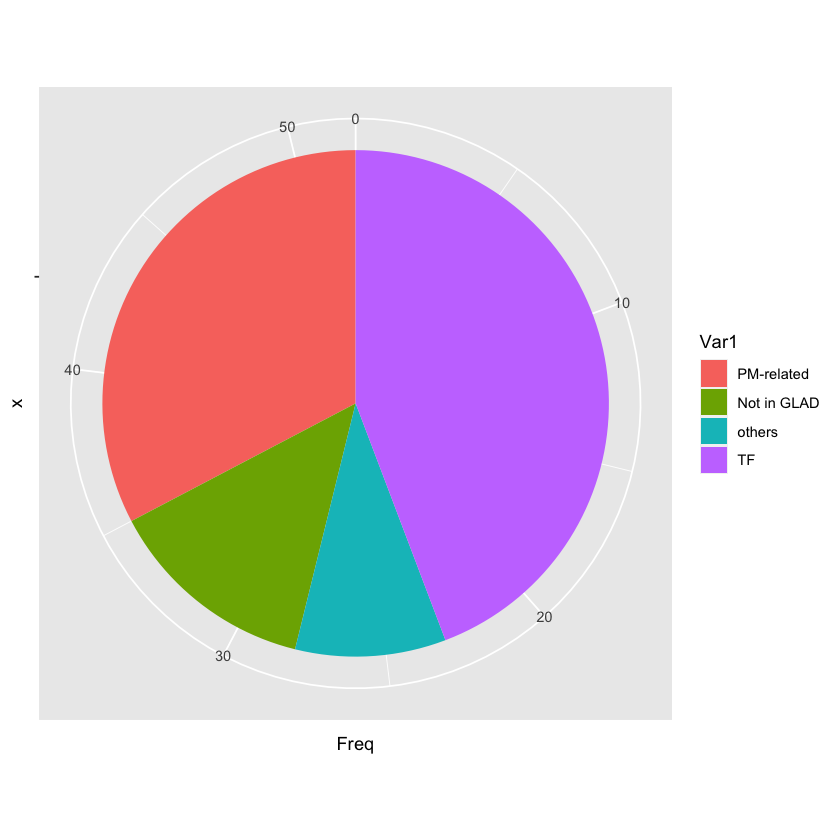

In [14]:
g <- ggplot(df.plot, aes(x="", y=Freq, fill=Var1)) +
   geom_bar(stat="identity", width = 1) + 
   coord_polar("y")
g
ggsave(g, file = "./figures/DEGs_adjacent_unique_list_GLAD_chart_FC1.75.eps", dpi = 300)

In [15]:
degs.sb <- read.table("./DEG_superboundary_FC1.75/unique_DEGs_list_FWER0.01_FC1.75_superboundary.txt")$V1

In [16]:
glad.table.degs.sb <- glad.table[degs.sb,]
levels <- c('PM-related','Not in GLAD','others','TF')
df.plot <- table(glad.table.degs.sb$Modified_GLAD)
df.plot <- df.plot[levels]
df.plot <- as.data.frame(df.plot)
head(df.plot)

,Var1,Freq
,<fct>,<int>
1,PM-related,24
2,Not in GLAD,17
3,others,12
4,TF,31


Saving 7 x 7 in image



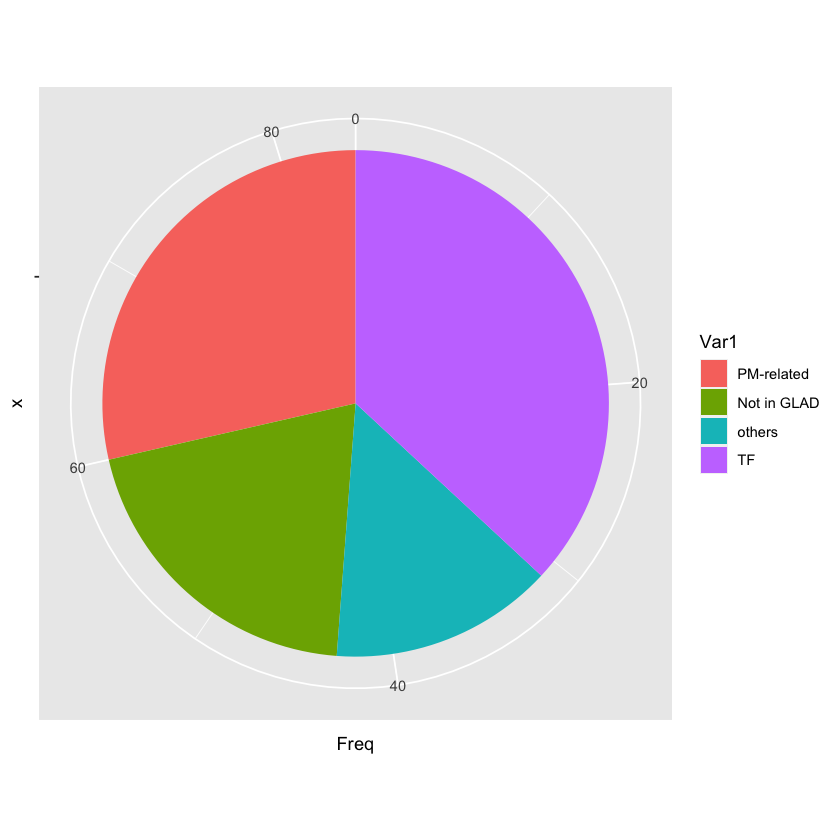

In [17]:
g <- ggplot(df.plot, aes(x="", y=Freq, fill=Var1)) +
   geom_bar(stat="identity", width = 1) + 
   coord_polar("y")
g
ggsave(g, file = "./figures/DEGs_SB_unique_list_GLAD_chart_FC1.75.eps", dpi = 300)

In [18]:
detected.genes <- row.names(seu_PR)
detected.genes <- detected.genes[detected.genes %in% c('GAL4','CD8mCherry')]
glad.table.detected <- glad.table[,]
dim(glad.table.detected)

[1] 17505     8

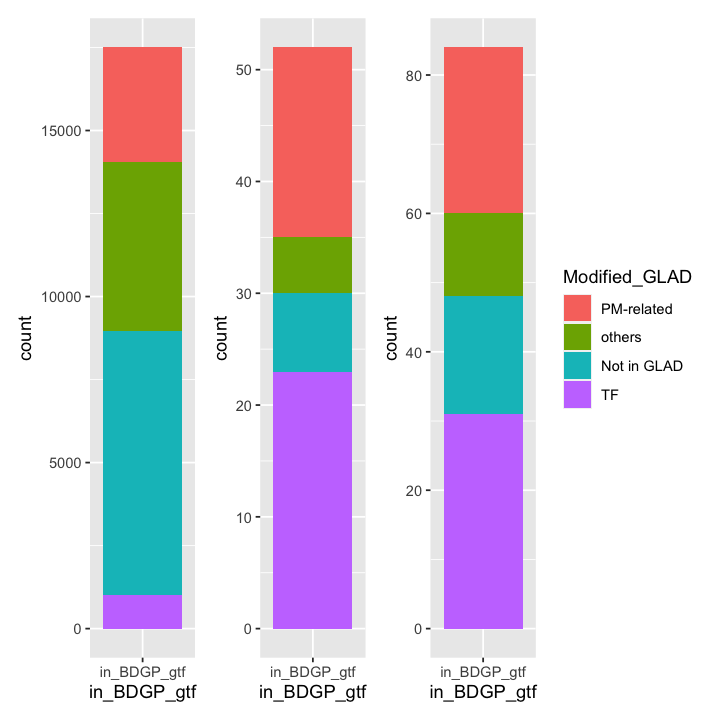

In [19]:
options(repr.plot.width=6, repr.plot.height=6)

#in detected genes
g3 <- ggplot(glad.table.detected, aes(x = in_BDGP_gtf, fill = Modified_GLAD))
g3 <- g3 + geom_bar() + NoLegend()

# in DEGs

g1 <- ggplot(glad.table.degs, aes(x = in_BDGP_gtf,fill = Modified_GLAD))
g1 <- g1 + geom_bar()
g1 <- g1 + NoLegend()

# in SB DEGs

g2 <- ggplot(glad.table.degs.sb, aes(x = in_BDGP_gtf,fill = Modified_GLAD))
g2 <- g2 + geom_bar() 
g2 <- g2



g3 + g1 + g2

In [20]:
n.pm.detected <- sum(glad.table.detected$Modified_GLAD == 'PM-related')
n.pm.deg <- sum(glad.table.degs$Modified_GLAD == 'PM-related')
n.not.pm.detected <- sum(glad.table.detected$Modified_GLAD != 'PM-related')
n.not.pm.deg <- sum(glad.table.degs$Modified_GLAD != 'PM-related')
mat <- c(n.pm.deg, n.pm.detected - n.pm.deg, n.not.pm.deg, n.not.pm.detected - n.not.pm.deg)
mat <- matrix(mat, nrow = 2)
mat
fisher.test(mat)

17,35
3434,14019



	Fisher's Exact Test for Count Data

data:  mat
p-value = 0.02327
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 1.040366 3.640477
sample estimates:
odds ratio 
  1.982889 


In [21]:
n.pm.detected <- sum(glad.table.detected$Modified_GLAD == 'PM-related')
n.pm.deg <- sum(glad.table.degs.sb$Modified_GLAD == 'PM-related')
n.not.pm.detected <- sum(glad.table.detected$Modified_GLAD != 'PM-related')
n.not.pm.deg <- sum(glad.table.degs.sb$Modified_GLAD != 'PM-related')
mat <- c(n.pm.deg, n.pm.detected - n.pm.deg, n.not.pm.deg, n.not.pm.detected - n.not.pm.deg)
mat <- matrix(mat, nrow = 2)
mat
fisher.test(mat)

24,60
3427,13994



	Fisher's Exact Test for Count Data

data:  mat
p-value = 0.0529
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.9712571 2.6669322
sample estimates:
odds ratio 
  1.633325 


In [22]:
n.pm.detected <- sum(glad.table.detected$Modified_GLAD == 'others')
n.pm.deg <- sum(glad.table.degs$Modified_GLAD == 'others')
n.not.pm.detected <- sum(glad.table.detected$Modified_GLAD != 'others')
n.not.pm.deg <- sum(glad.table.degs$Modified_GLAD != 'others')
mat <- c(n.pm.deg, n.pm.detected - n.pm.deg, n.not.pm.deg, n.not.pm.detected - n.not.pm.deg)
mat <- matrix(mat, nrow = 2)
mat
fisher.test(mat)

5,47
5079,12374



	Fisher's Exact Test for Count Data

data:  mat
p-value = 0.001123
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.08038047 0.64935974
sample estimates:
odds ratio 
 0.2591774 


In [23]:
n.pm.detected <- sum(glad.table.detected$Modified_GLAD == 'others')
n.pm.deg <- sum(glad.table.degs.sb$Modified_GLAD == 'others')
n.not.pm.detected <- sum(glad.table.detected$Modified_GLAD != 'others')
n.not.pm.deg <- sum(glad.table.degs.sb$Modified_GLAD != 'others')
mat <- c(n.pm.deg, n.pm.detected - n.pm.deg, n.not.pm.deg, n.not.pm.detected - n.not.pm.deg)
mat <- matrix(mat, nrow = 2)
mat
fisher.test(mat)

12,72
5072,12349



	Fisher's Exact Test for Count Data

data:  mat
p-value = 0.002357
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.2002460 0.7539712
sample estimates:
odds ratio 
 0.4058128 
